In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [6]:
path='/home/vbriones/tem-output/TEST-STEP2-MD1-CR/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

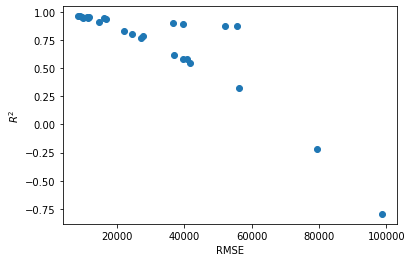

In [7]:

ut.plot_r2_rmse(df_model)

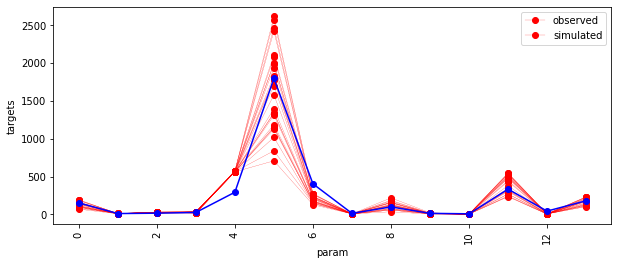

In [14]:
results_dir='/data/workflows/TEST-STEP2-MD1-CR-redo/'


def plot_obs_vs_mod(obs,tar): 
  '''
  VARNAME: variable name
  obs: observation data 
  out: modeled data
  '''
  plt.figure(figsize=(10,4))
  plt.plot(obs,'r',linewidth=0.2, marker = 'o')
  plt.plot(tar,'b', marker = 'o');
  plt.xticks(rotation=90)
  plt.ylabel('targets');plt.xlabel('param')
  plt.legend(['observed','simulated']);


def rmse_SA(results_dir,fplot=False):
  '''
  VAROBS: variable name observaion
  VAROUT: variable name output
  '''
  results=pd.read_csv(path+'results.csv', header=None)
  obs=results. iloc[:-1,:].transpose()
  tar=results. iloc[-1:,:].transpose()
  common_index = set(obs.index).intersection(tar.index)


  if fplot:
    plot_obs_vs_mod(obs,tar)
X_sample=pd.read_csv(path+"sample_matrix.csv")



### MODIFY THIS TO YOUR VARIABLES, currently defaulted to GPP, ALD, SNOWTHICK ###
rmse_SA(path,1)

In [19]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)

STEP2-CR:NPP/VEGC model score on data: 0.9293775916589273


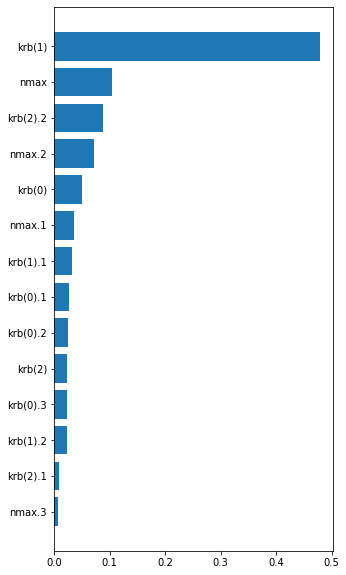

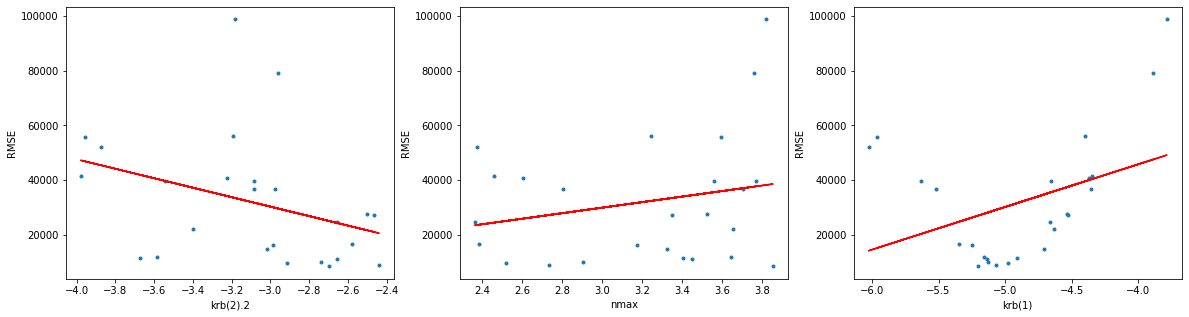

In [38]:

def find_important_features(X,y,fplot=False,fname=''):
    
  model = RandomForestRegressor()

 # lets split sample matrix to 80% train and 20% test
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.2, random_state=0)

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  print(fname + f' model score on data: {model.score(X_train, y_train)}')
  if fplot:
    importances = model.feature_importances_
    indices = np.argsort(importances)

    fig, ax = plt.subplots(figsize=(5, 10))
    ax.barh(range(len(importances)), importances[indices])
    ax.set_yticks(range(len(importances)))
    _ = ax.set_yticklabels(np.array(X_train.columns)[indices])
    
    top_names =np.array(X_train.columns)[indices][-3:]
    fig,ax=plt.subplots(1,len(top_names),figsize=(20, 5))
    for i,x in enumerate(top_names):
        slope, intercept, _, _, _ = linregress(X_sample[x].values,y)
        ax[i].plot(X_sample[x].values,y,'.'); ax[i].set(xlabel=x, ylabel='RMSE');
        ax[i].plot(X_sample[x].values, slope * X_sample[x].values + intercept, 'r')

#     plt.tight_layout()  

find_important_features(X_sample,rmse,1,'STEP2-CR:NPP/VEGC')